In [10]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt
import numpy as np

From the 10-class database, choose three classes (5, 6 and 8) and then reduce dimension to 2

In [3]:
train5 = np.loadtxt("Data/train5.txt")/255 # /255 for normalization
train6 = np.loadtxt("Data/train6.txt")/255
train8 = np.loadtxt("Data/train8.txt")/255

# Define targets 
train5_target = 5*np.ones(len(train5))
train6_target = 6*np.ones(len(train6))
train8_target = 8*np.ones(len(train8))
# Combine data
train_data = np.concatenate([train5, train6, train8])
train_targets = np.concatenate([train5_target, train6_target, train8_target])

In [4]:
test5 = np.loadtxt("Data/test5.txt")/255
test6 = np.loadtxt("Data/test6.txt")/255
test8 = np.loadtxt("Data/test8.txt")/255

# Define targets 
test5_target = 5*np.ones(len(test5))
test6_target = 6*np.ones(len(test6))
test8_target = 8*np.ones(len(test8))

# Combine
test_data = np.concatenate([test5, test6, test8])
test_targets = np.concatenate([test5_target, test6_target, test8_target])

# Class names
classes = np.array([5,6,8])

In [5]:
pca = PCA(n_components = 2)
pca.fit(train_data)
trn2d_pca = pca.transform(train_data)

In [6]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(train_data, train_targets)
trn2d_lda = lda.transform(train_data)

In [7]:
#Separating the datasets again for easier manipulation 
trn5_pca = trn2d_pca[:len(train5), :]
trn6_pca = trn2d_pca[(len(train5) + 1):(len(train5) + len(train6)), :]
trn8_pca = trn2d_pca[(len(train5) + len(train6) + 1):, :]

(5421, 2)
(5917, 2)
(5850, 2)


In [9]:
trn5_lda = trn2d_lda[:len(train5), :]
trn6_lda = trn2d_lda[(len(train5) + 1):(len(train5) + len(train6)), :]
trn8_lda = trn2d_lda[(len(train5) + len(train6) + 1):, :]

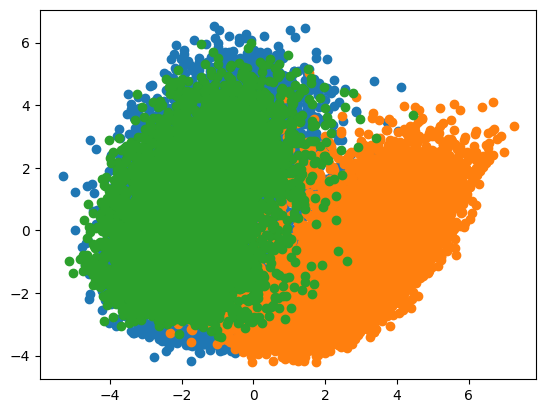

In [15]:
#Scatter plots PCA
plt.scatter(trn5_pca[:,0], trn5_pca[:,1])
plt.scatter(trn6_pca[:,0], trn6_pca[:,1])
plt.scatter(trn8_pca[:,0], trn8_pca[:,1])

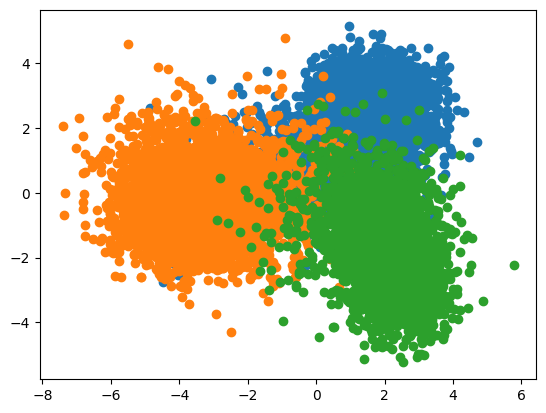

In [16]:
#Scatter plots LDA
plt.scatter(trn5_lda[:,0], trn5_lda[:,1])
plt.scatter(trn6_lda[:,0], trn6_lda[:,1])
plt.scatter(trn8_lda[:,0], trn8_lda[:,1])

Perform 3-class classification based on the generated 2-dimensional data

In [8]:
#Find means and covariance matrices for all 3 classes
mean5 = np.mean(trn2d_pca[:len(train5), :], axis = 0)
cov5 = np.cov(trn2d_pca[:len(train5), :], rowvar=False)

mean5 = np.mean(trn2d_pca[:len(train5), :], axis = 0)
cov5 = np.cov(trn2d_pca[:len(train5), :], rowvar=False)

mean5 = np.mean(trn2d_pca[:len(train5), :], axis = 0)
cov5 = np.cov(trn2d_pca[:len(train5), :], rowvar=False)

biv_norm_5 = multivariate_normal(mean5, cov5)
#Likelihood of data coming from a 3-D gaussian with given mean and cov
def likelihood(data, mean, cov):
        a = -0.5 * np.matmul((data - mean), np.linalg.inv(cov))
        b = np.matmul(a,(data - mean))
        likelihood = (1 / (2 * np.pi)) * (1 / (np.linalg.det(cov) ** (1/2)) * np.exp(b))
        return(likelihood)

#The posterior probability of data belonging to class '1'
#In the case of binary classification we only need to calculate the posterior for one of the two classes.
def posterior(data, mean, cov, prior_x = 0.5, prior_y = 0.5):
    posterior = (likelihood(data, train_x_mean, train_x_cov) * prior_x) / ((likelihood(data, train_x_mean, train_x_cov) * prior_x) + (likelihood(data, train_y_mean, train_y_cov) * prior_y))
    return(posterior)
